In [59]:
import matplotlib.pyplot as plt
import json
import numpy as np


with open('data.json', 'r') as f:
    data = json.load(f)

keys = list(data[0].keys())
confidences = [item['confidence'] for item in data]
labels = [item['label'] for item in data]
output_labels = [item['output_label'] for item in data]
score = [item['confidence']*10 for item in data]

correct_predictions = [1 if (output_label == label) else 0 for output_label, label in zip(output_labels, labels)]
accuracy = np.mean (correct_predictions)
print(accuracy)

0.7651784538390622


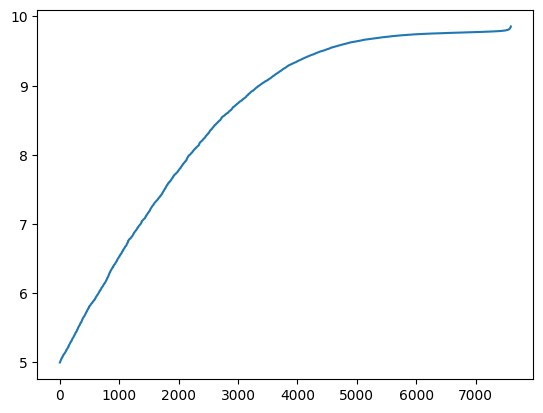

In [55]:
score.sort()
plt.plot(score)
plt.show()

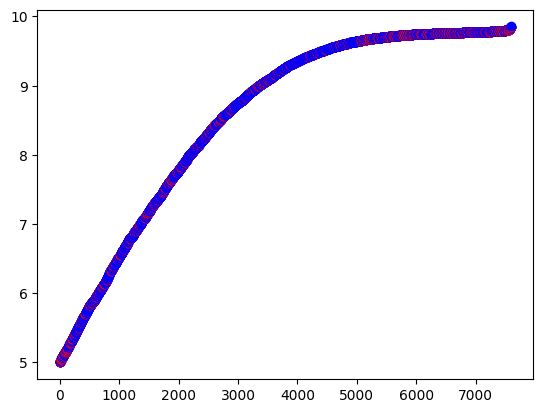

<Figure size 15000x1200 with 0 Axes>

In [54]:
score.sort()
col =['red','blue']

for i,j in zip(range(len(score)),correct_predictions):
    plt.scatter(i,score[i], color=col[j])

plt.figure(figsize=(150,12))
plt.show()

In [57]:
d1,d2,d3,d4,d5 = [],[],[],[],[]

for n,m in zip(score,range(len(score))):
    if correct_predictions[m] == 0:
        if 5 < n < 6: d1.append(n)
        if 6 < n < 7: d2.append(n)
        if 7 < n < 8: d3.append(n)
        if 8 < n < 9: d4.append(n)
        if 9 < n < 10: d5.append(n)

print(len(d1),len(d2),len(d3),len(d4),len(d5))
print((len(d1)/1657)*100,(len(d2)/1657)*100,(len(d3)/1657)*100,(len(d4)/1657)*100,(len(d5)/1657)*100)

164 140 167 202 1110
9.897404948702475 8.449004224502112 10.07845503922752 12.190706095353047 66.98853349426675


In [47]:
TP, TN, FP, FN = 0,0,0,0
for i in range(len(score)):
    if labels[i] == 1 and output_labels[i] == 1: TP += 1
    if labels[i] == 0 and output_labels[i] == 0: TN += 1
    if labels[i] == 0 and output_labels[i] == 1: FP += 1
    if labels[i] == 1 and output_labels[i] == 0: FN += 1

print(TP,TN,FP,FN)

2593 3217 1182 601


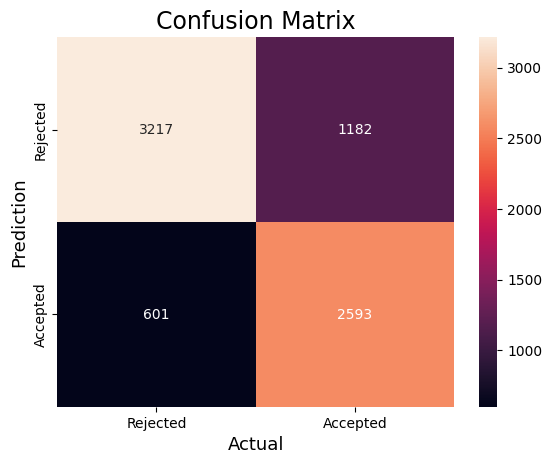

In [52]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
 

actual    = np.array(labels)
predicted = np.array(output_labels)

cm = confusion_matrix(actual,predicted)


sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Rejected','Accepted'],
            yticklabels=['Rejected','Accepted'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()